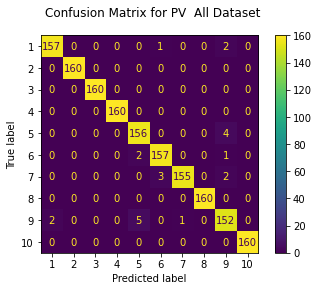

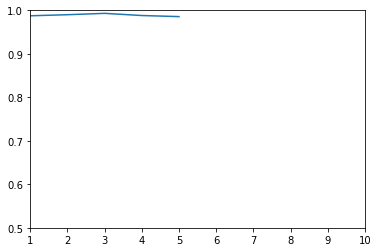

0.985625


In [9]:
from sklearn.decomposition   import PCA
from sklearn.model_selection import KFold
from sklearn.metrics         import accuracy_score
from sklearn                 import preprocessing
from sklearn.metrics         import plot_confusion_matrix
from sklearn.ensemble        import AdaBoostClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import precision_score
from sklearn.metrics         import classification_report
from sklearn.tree            import DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import VotingClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np


#Load Data
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/jupyter/Pv_Data3.csv")
df;
X = df.drop(['Target','I1','I2','I3','I4','I5','I6','I7','I8'],axis=1).values
X1= df.drop(['Target','Voc','Isc','Vmp','Imp','Pmp','T','G',],axis=1).values
Y=df.drop(['Voc','Isc','Vmp','Imp','Pmp','T','G','I1','I2','I3','I4','I5','I6','I7','I8',],axis=1).values.ravel()
X.shape


#preproccesing
pca = PCA(n_components=7)
pca.fit(X)
X= pca.transform(X)

#trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3,random_state=42)

k=5
kf=KFold(n_splits=k,random_state=None)

#model1 = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=11, random_state=0)
model2 = KNeighborsClassifier(n_neighbors=2)
model3 = SVC(kernel='linear' ,C=20, gamma='auto',probability=True)
model4 = RandomForestClassifier(n_estimators=41, max_depth=7, criterion='entropy' ,random_state=0)
model = VotingClassifier(estimators=[('knn',model2), ('svc',model3), ('RF',model4)],voting='soft', weights=[1, 2, 2])

acc_score_test=[]
acc_score_train=[]
acc_score_all=[]  

for train_ind,test_ind in kf.split(X):
    trainX,testX = X[train_ind,:] , X[test_ind]
    trainY,testY = Y[train_ind]   , Y[test_ind]
    
    model.fit(trainX,trainY)
    
    pred_values_test=model.predict(testX)
    pred_values_train=model.predict(trainX)
    pred_values_all=model.predict(X)
      
    acc_test=accuracy_score(pred_values_test,testY)
    acc_train=accuracy_score(pred_values_train,trainY)
    acc_all=accuracy_score(pred_values_all,Y)
    
    acc_score_test.append(acc_test)
    acc_score_train.append(acc_train)
    acc_score_all.append(acc_all)
    
    
avrage_acc_score_test=np.mean(acc_score_test)    
avrage_acc_score_train=np.mean(acc_score_train)    
avrage_acc_score_all=np.mean(acc_score_all)


pred=model.predict(X)
acc=accuracy_score(pred,Y)

cr=classification_report(Y,pred)

fig = plot_confusion_matrix(model,X,Y, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV  All Dataset")
plt.show()

t=[1,2,3,4,5]
plt.plot(t,acc_score_all)
plt.xlim(1,10)
plt.ylim(0.5,1)
plt.show()

print(acc)

In [10]:
print(avrage_acc_score_test)
print(avrage_acc_score_train)
print(avrage_acc_score_all)

0.959375
0.9962500000000001
0.988875
